### Practical 4


#### Boston House Pricing

In [1]:
import pandas

In [2]:
import os
print(os.path.exists(r"C:\Users\hp\Downloads\BostonHousing.xlsx"))

True


In [3]:
df = pandas.read_excel(r"C:\Users\hp\Downloads\BostonHousing.xlsx")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

##### No null values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn
import matplotlib.pyplot as plt

In [10]:
X = df.drop(columns = 'medv')
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
Y = df['medv']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
df.shape

(506, 14)

In [13]:
X.shape

(506, 13)

In [14]:
Y.shape

(506,)

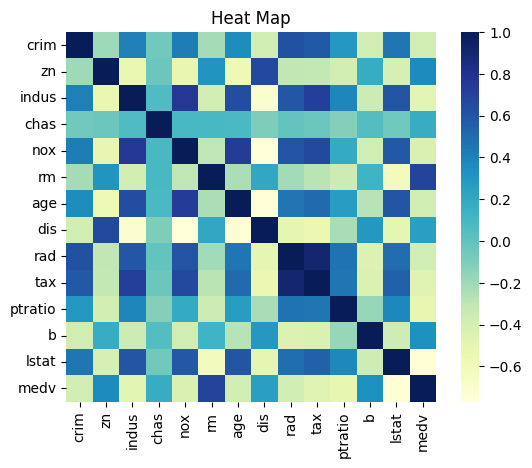

In [15]:
names = []
correlations = df.corr()
seaborn.heatmap(correlations, square = True, cmap = "YlGnBu")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title("Heat Map")
plt.show()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

##### We have created and trained the model

In [18]:
Y_pred = lr_model.predict(X_test)

In [19]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [20]:
print("Mean Squared Error:", (mse))
print("R Squared:", (r2))

Mean Squared Error: 24.29111947497374
R Squared: 0.6687594935356289


##### This is the evaluation metrics

In [ ]:
import numpy
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

predicted_price = 0

# Function to take user input and predict house price
def predict_house_price():
    global predicted_price
    # List of feature names and their corresponding value ranges (approximate)
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    # Initialize an empty list to store user inputs
    user_input = []

    print("Please enter the following values for the house:")

    # Loop through each feature and get input from the user, specifying ranges
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))  # Get the value from user
        user_input.append(value)

    # Convert user input into a NumPy array and reshape it for prediction
    input_data = numpy.array(user_input).reshape(1, -1)

    # Make prediction using the trained linear regression model
    predicted_price = lr_model.predict(input_data)

    # Output the predicted price
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()

import tkinter

window = tkinter.Tk()
window.minsize(250,300)
window.config(bg = "white")
window.title("Boston Houses")

from PIL import Image, ImageTk

image = Image.open(r"C:\Users\hp\Downloads\Housee.png") 
resized_image = image.resize((300, 250))

tk_image = ImageTk.PhotoImage(resized_image)

canvas = tkinter.Canvas(highlightthickness = 2)
img = tkinter.PhotoImage(file = r"C:\Users\hp\Downloads\Housee.png")
canvas.create_image(190,130, image = tk_image)
canvas.grid(column = 1, row = 1, columnspan = 3)

price_label = tkinter.Label()
price_label.config(text = f"Price: {predicted_price[0] * 1000:.2f}", font = ("Helvatica", "15", "bold"), pady = 10)
price_label.grid(column = 1, row = 2, columnspan = 3)

window.mainloop()


Please enter the following values for the house:


Enter value for crim (per capita crime rate by town (range: 0 to 100)):  54
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)):  45
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)):  23
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)):  1
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)):  0.5
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)):  5
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)):  45
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)):  12
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)):  12
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)):  345
Enter value for ptratio (pupil-teacher ratio by town (range: 12 to 22)):  12
Enter 


Predicted House Price: $605.36


In [ ]:
import os
print(os.path.exists(r"C:\Users\hp\Downloads\Housee.png"))